## Increasing the vibrance of a photograph

**(a) Split the image into hue, saturation, and value planes**

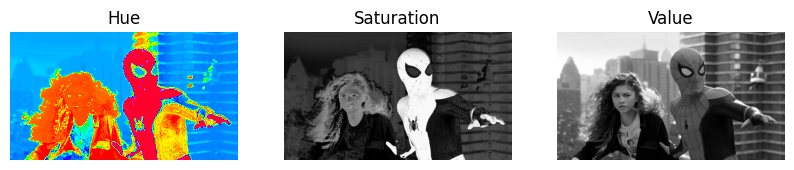

In [1]:
# Split the image into hue, saturation, and value planes and display them.
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\spider.png'
img = cv.imread(img_path)

# Convert the image to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
h, s, v = cv.split(hsv)

# Display the images
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')
plt.title('Hue')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')
plt.axis('off')

plt.show()

**(b) Apply the aforementioned intensity transformation to the saturation plane.**

**(c) Adjust a to get a visually pleasing output. Report the value of a.**

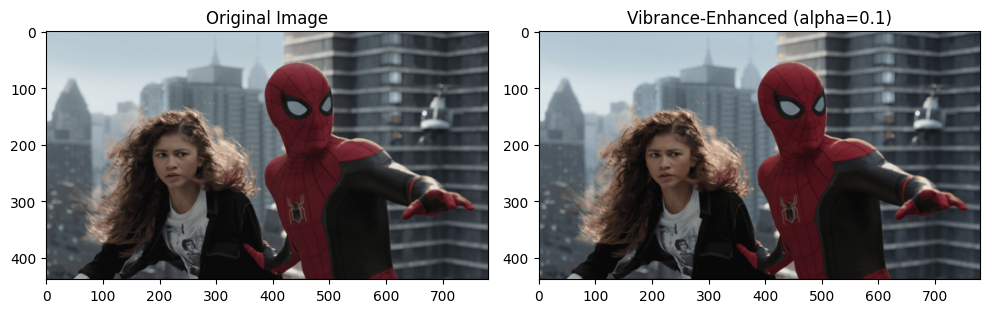

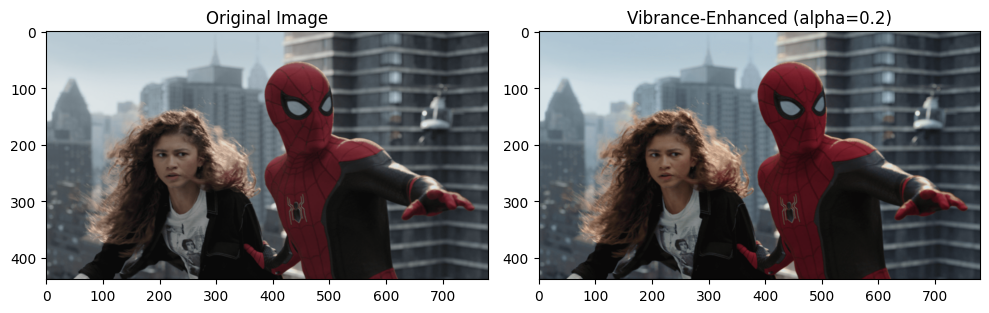

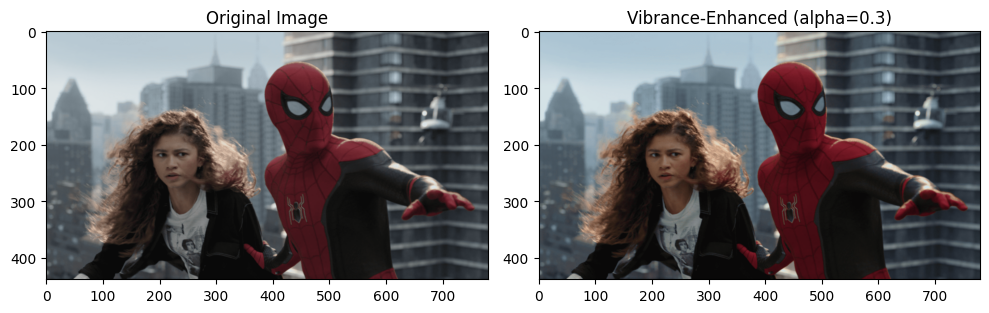

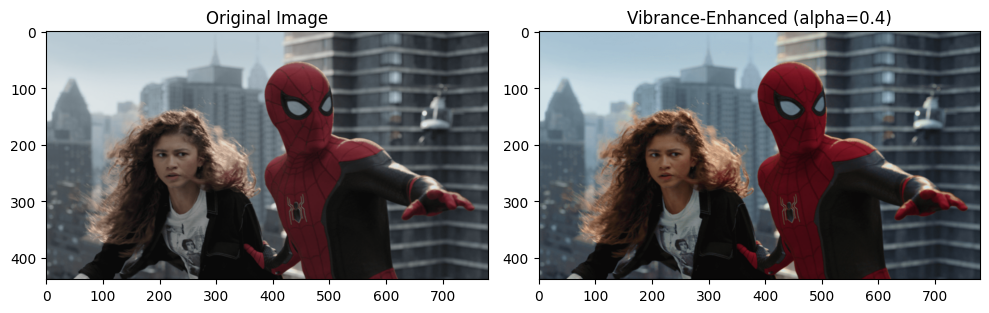

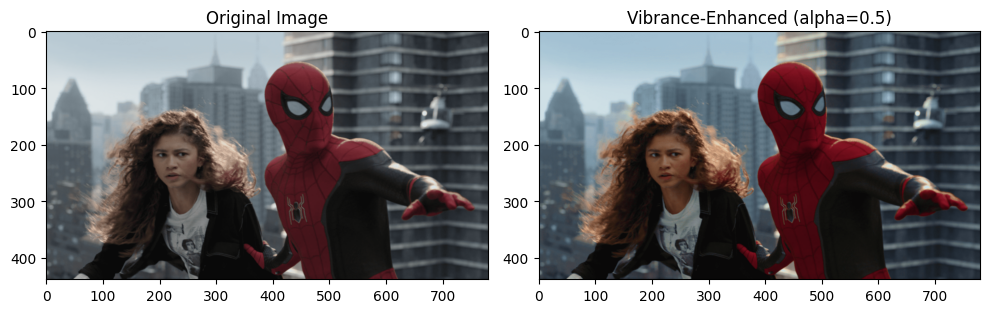

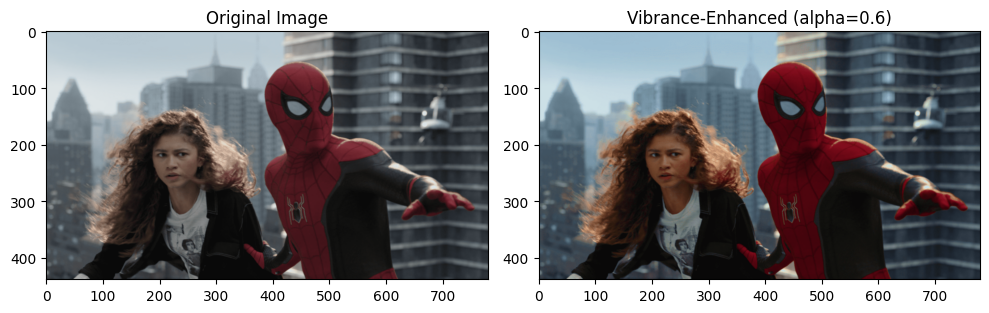

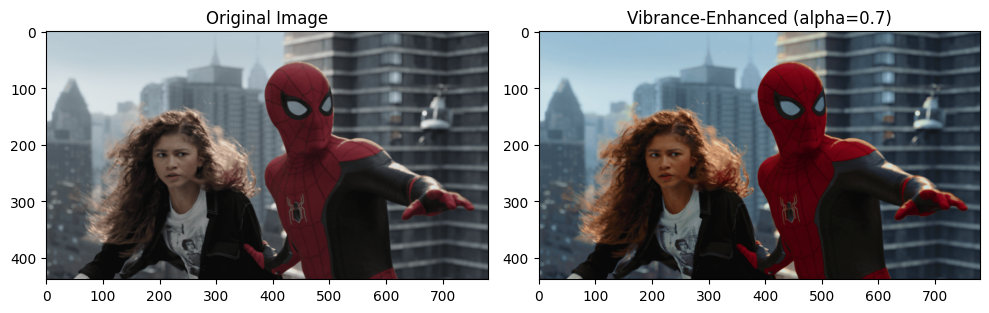

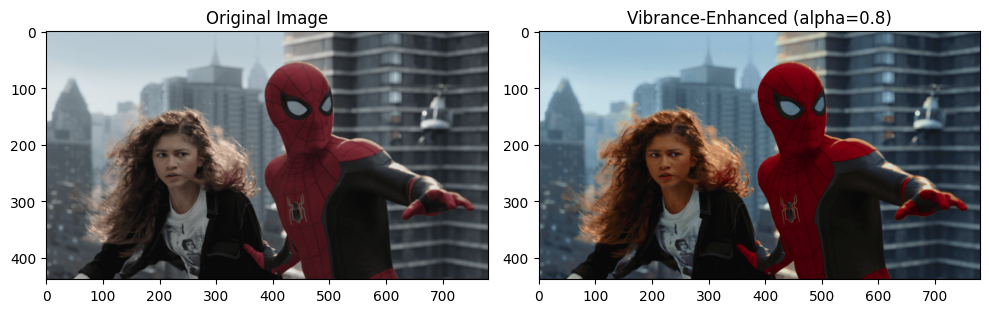

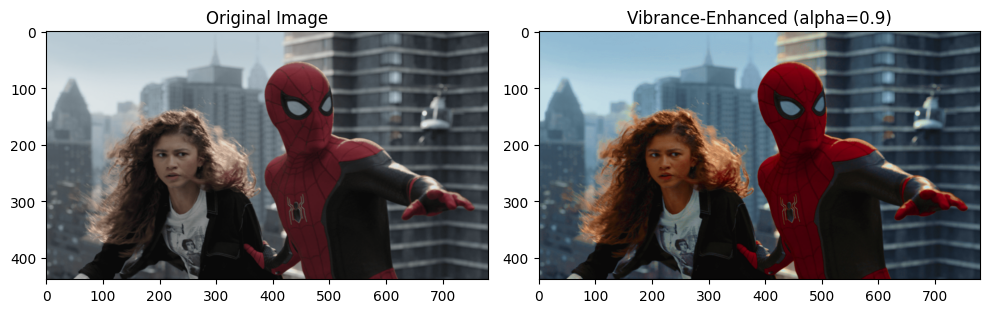

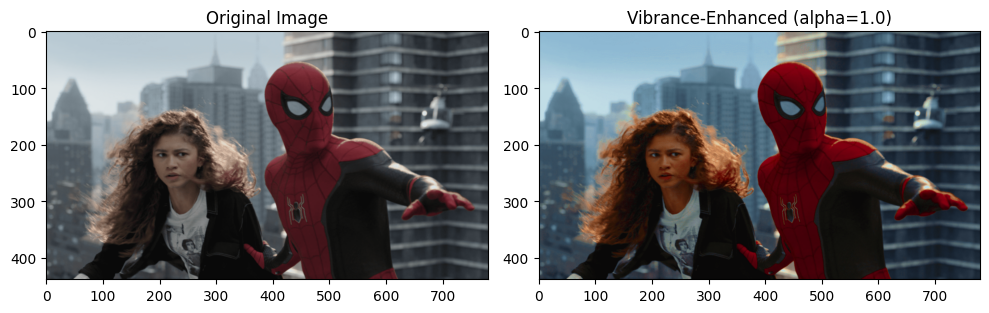

In [2]:
# Convert to HSV color space
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the HSV image into its three channels
h, s, v = cv.split(hsv_img)

# Parameters for transformation
sigma = 70
sigma_sq = 2 * (sigma ** 2)

# Define the intensity transformation function
def intensity_transform(x, alpha, sigma_sq):
    return min(x + alpha * 128 * np.exp(-((x - 128) ** 2) / sigma_sq), 255)

# Vectorize the transformation function for pixel-wise application
vectorized_transform = np.vectorize(intensity_transform)

# Iterate over alpha values from 0 to 1, stepping by 0.1
for alpha in np.arange(0.1, 1.1, 0.1):
    # Apply the transformation to the saturation channel
    s_transformed = vectorized_transform(s, alpha, sigma_sq)
    s_transformed = s_transformed.astype(np.uint8)

    # Recombine the channels: use the transformed saturation with original hue and value channels
    hsv_transformed = cv.merge([h, s_transformed, v])

    # Convert back to BGR color space for display or saving
    bgr_transformed = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2BGR)

    # Plotting the original and vibrance-enhanced images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(bgr_transformed, cv.COLOR_BGR2RGB))
    plt.title(f"Vibrance-Enhanced (alpha={alpha:.1f})")

    plt.tight_layout()
    plt.show()

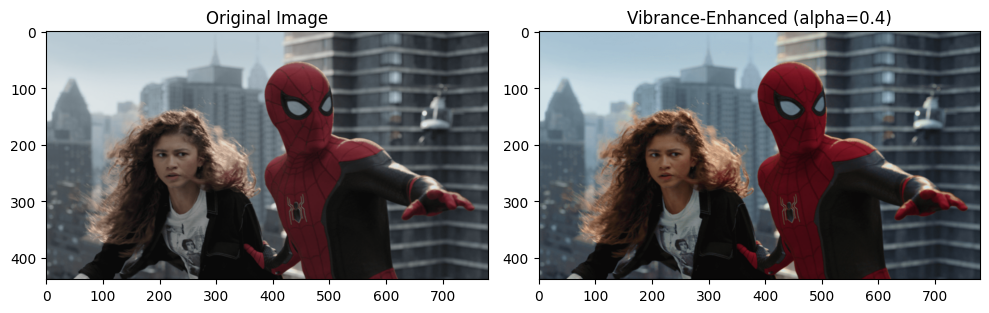

In [3]:
# choose alpha = 0.4
alpha = 0.4

# Apply the transformation to the saturation channel
s_transformed = vectorized_transform(s, alpha, sigma_sq)
s_transformed = s_transformed.astype(np.uint8)

# Recombine the channels: use the transformed saturation with original hue and value channels
hsv_transformed = cv.merge([h, s_transformed, v])

# Convert back to BGR color space for display or saving
bgr_transformed = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2BGR)

# Plotting the original and vibrance-enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(bgr_transformed, cv.COLOR_BGR2RGB))
plt.title(f"Vibrance-Enhanced (alpha={alpha:.1f})")

plt.tight_layout()
plt.show()

**(d) Recombine the three planes.**

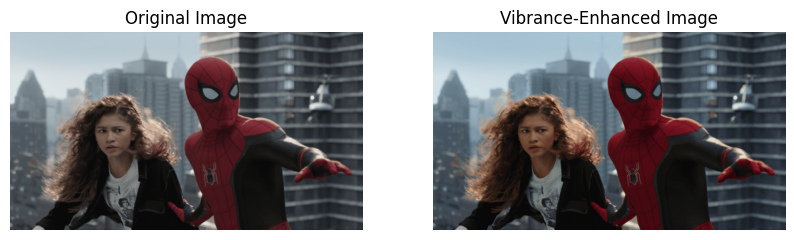

In [4]:
# Recombine the three planes
hsv_transformed = cv.merge([h, s_transformed, v])

# Convert the HSV image back to BGR
bgr_transformed = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2BGR)

# Display the original and vibrance-enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(bgr_transformed, cv.COLOR_BGR2RGB))
plt.title('Vibrance-Enhanced Image')
plt.axis('off')

plt.show()

**(e) Display the original image, vibrance-enhanced image, and the intensity transformation.**

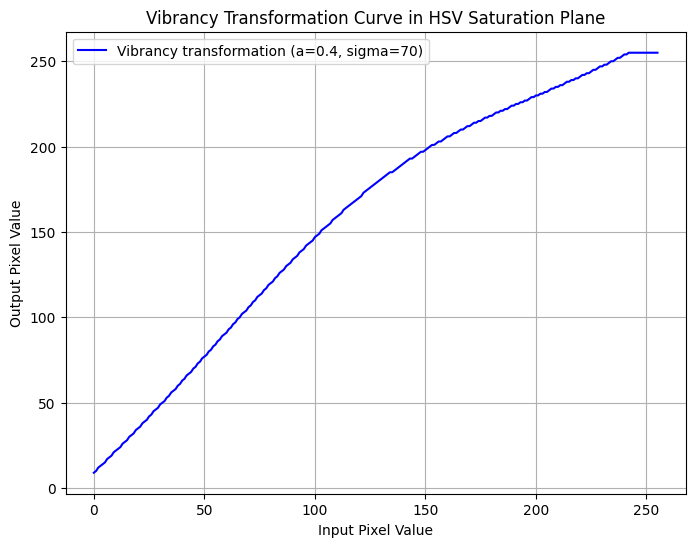

In [5]:
# Set the transformation parameter 'a'
a = 0.4
sigma = 70

# Generate a range of input pixel values from 0 to 255
input_values = np.arange(0, 256)

# Intensity transformation function
def intensity_transform(x, a, sigma=50):
    x = np.clip(x, 0, 255)  # Ensure x stays within valid range
    transformed = x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2))
    return np.clip(transformed, 0, 255).astype(np.uint8)

# Apply the transformation to each pixel value
output_values = [intensity_transform(x, a, sigma) for x in input_values]

# Plot the transformation
plt.figure(figsize=(8, 6))
plt.plot(input_values, output_values, label=f'Vibrancy transformation (a={a}, sigma={sigma})', color='blue')
plt.xlabel('Input Pixel Value')
plt.ylabel('Output Pixel Value')
plt.title('Vibrancy Transformation Curve in HSV Saturation Plane')
plt.legend()
plt.grid(True)
plt.show()